# Loan Prediction

## Data cleaning and preparation

In [3]:
import pandas as pd
import numpy as np

In [4]:
data = pd.read_csv('Default_Fin.csv')

In [5]:
data.head()

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,1,8754.36,532339.56,0
1,2,0,9806.16,145273.56,0
2,3,1,12882.60,381205.68,0
3,4,1,6351.00,428453.88,0
4,5,1,9427.92,461562.00,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Index          10000 non-null  int64  
 1   Employed       10000 non-null  int64  
 2   Bank Balance   10000 non-null  float64
 3   Annual Salary  10000 non-null  float64
 4   Defaulted?     10000 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 390.8 KB


In [7]:
data.describe()

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,0.705600,10024.498524,402203.782224,0.033300
std,2886.89568,0.455795,5804.579486,160039.674988,0.179428
min,1.00000,0.000000,0.000000,9263.640000,0.000000
25%,2500.75000,0.000000,5780.790000,256085.520000,0.000000
50%,5000.50000,1.000000,9883.620000,414631.740000,0.000000
75%,7500.25000,1.000000,13995.660000,525692.760000,0.000000
max,10000.00000,1.000000,31851.840000,882650.760000,1.000000


In [8]:
data.isnull().sum()

Index            0
Employed         0
Bank Balance     0
Annual Salary    0
Defaulted?       0
dtype: int64

In [9]:
data.duplicated().sum()

0

## Exploratory data analysis


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

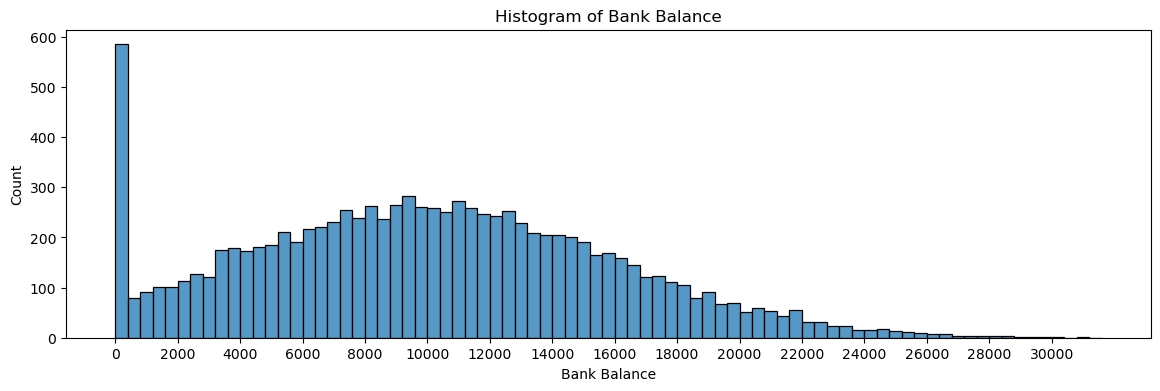

In [12]:
plt.figure(figsize=(14, 4))
sns.histplot(data=data, x='Bank Balance', bins=range(0,32000,400))
plt.xticks(range(0, 32000, 2000))
plt.title('Histogram of Bank Balance');

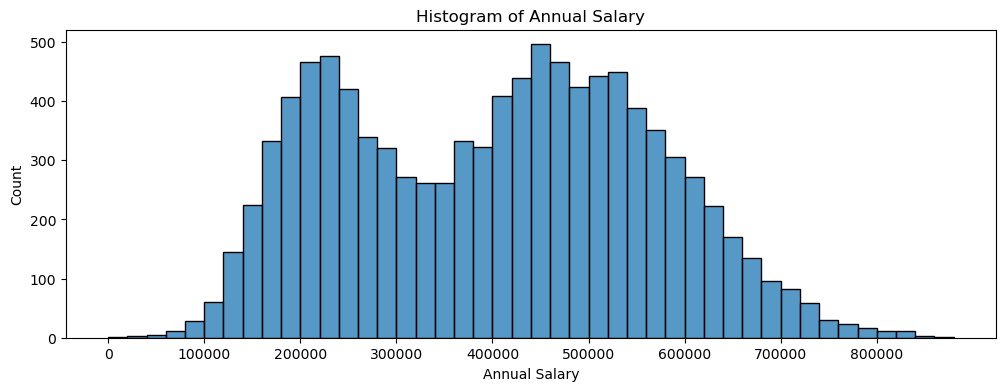

In [13]:
plt.figure(figsize=(12,4))
sns.histplot(data=data, x="Annual Salary", bins=range(0,900000,20000))
plt.xticks(range(0, 900000, 100000))
plt.title("Histogram of Annual Salary");

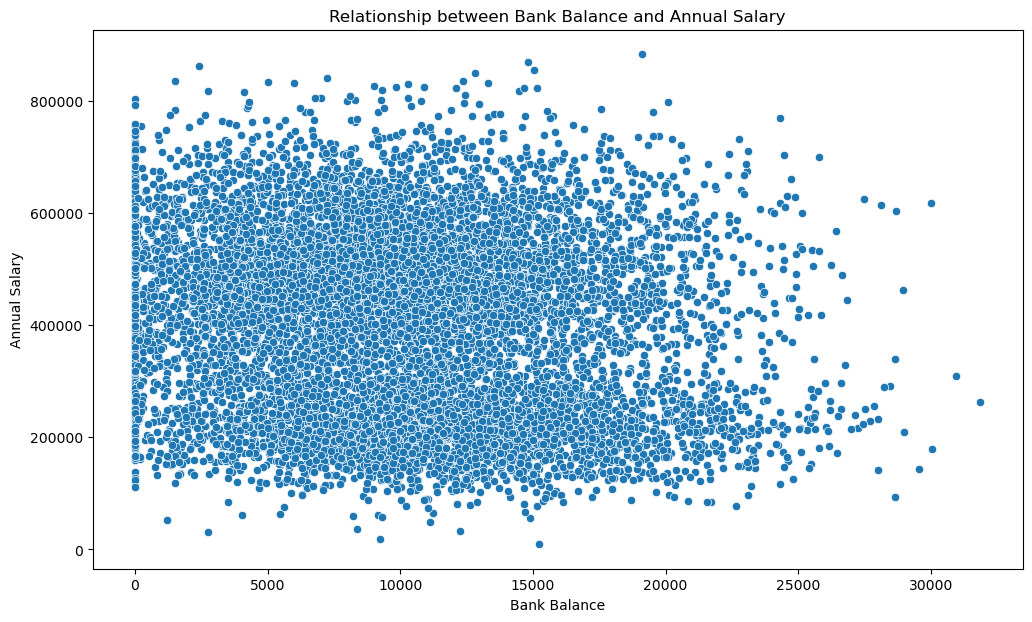

In [14]:
plt.figure(figsize=(12,7))
sns.scatterplot(x=data['Bank Balance'], y=data['Annual Salary'])
plt.title('Relationship between Bank Balance and Annual Salary');

<Axes: >

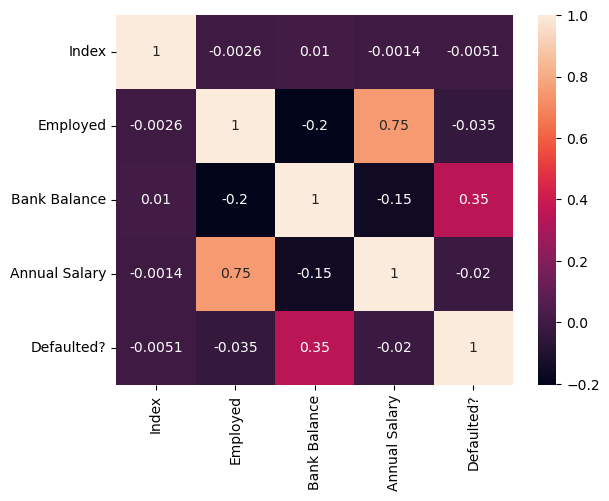

In [15]:
sns.heatmap(data.corr(), annot= True)

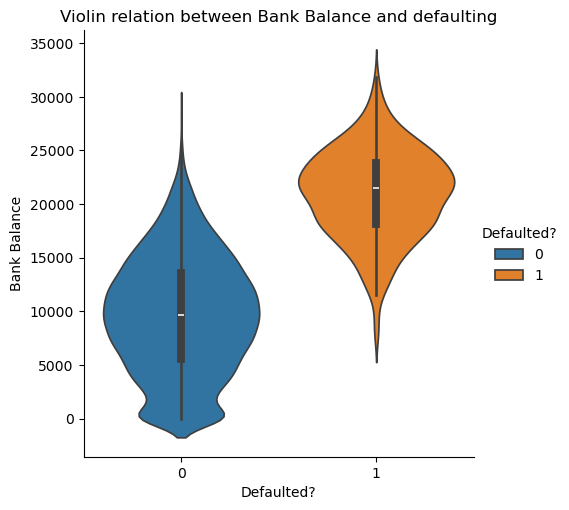

In [16]:
sns.catplot(data= data, x='Defaulted?', y='Bank Balance',
           hue='Defaulted?', kind='violin')
plt.title('Violin relation between Bank Balance and defaulting');

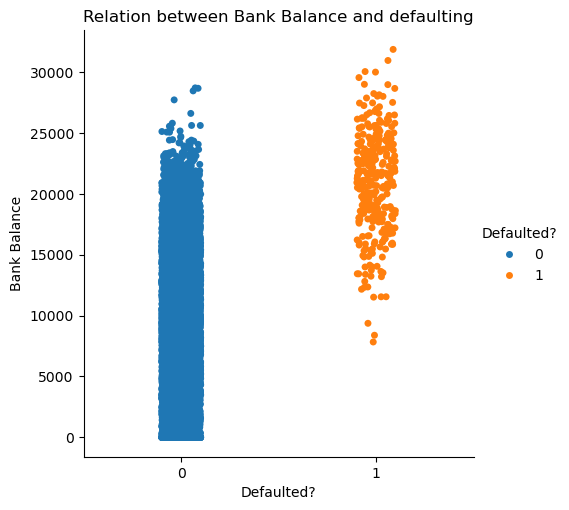

In [17]:
sns.catplot(data= data, x='Defaulted?', y='Bank Balance',
           hue='Defaulted?')
plt.title('Relation between Bank Balance and defaulting');

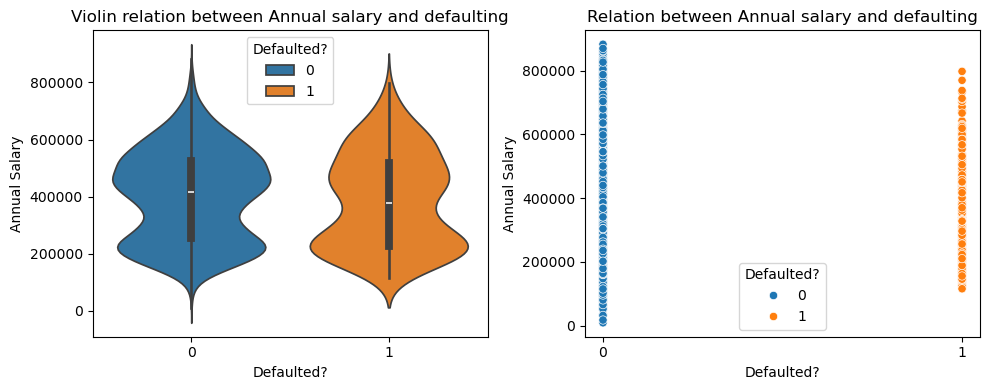

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))  # 1 row, 2 columns

# First subplot: violinplot
sns.violinplot(data=data, x='Defaulted?', y='Annual Salary', hue='Defaulted?', ax=axes[0])
axes[0].set_title('Violin relation between Annual salary and defaulting')

# Second subplot: barplot
sns.scatterplot(data=data, x='Defaulted?', y='Annual Salary', hue='Defaulted?', ax=axes[1])
plt.xticks([0, 1], ['0', '1'])
axes[1].set_title('Relation between Annual salary and defaulting')

plt.title('Relation between Annual salary and defaulting')
plt.tight_layout()
plt.show();


## Train Test Split

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X=data.iloc[:,:4]
y=data.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=28)

In [22]:
X.head()

,Index,Employed,Bank Balance,Annual Salary
0,1,1,8754.36,532339.56
1,2,0,9806.16,145273.56
2,3,1,12882.60,381205.68
3,4,1,6351.00,428453.88
4,5,1,9427.92,461562.00


## Standardization

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Hyperparameter tuning

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [28]:
rf= RandomForestClassifier()

In [29]:
params = {
    'n_estimators':(100, 1000), 
    'max_depth': (1, 20),
}

In [30]:
opt = RandomizedSearchCV(
    rf, param_distributions=params, n_iter=100, cv=5, random_state= 28, n_jobs= -1
)

## Model building

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
opt.fit(X_train_scaled, y_train)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=100. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': (1, 20),
                                        'n_estimators': (100, 1000)},
                   random_state=28)

In [34]:
opt.best_params_

{'n_estimators': 1000, 'max_depth': 20}

In [35]:
lr=LogisticRegression()
lr.fit(X_train_scaled, y_train)

LogisticRegression()

## Accuracy prediction


In [37]:
from sklearn.metrics import accuracy_score

In [38]:
rf_pred= opt.predict(X_test_scaled)
print('Random forest classifier:', accuracy_score(y_test, rf_pred))

Random forest classifier: 0.9713333333333334


In [39]:
lr_pred= lr.predict(X_test_scaled)
print('Logistic regression:', accuracy_score(y_test, lr_pred))

Logistic regression: 0.9726666666666667


.